In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.integrate import cumtrapz,simps

from Funciones_auxiliares import plot_branch,get_cluster_indexs,plots_hierarchichal_clustering


Intentamos encontrar la manera de obtener una derivada primera y segunda de una senial neuronal que sea capaz de reconstruir las senial original por medio de intergraciones

In [2]:
data = '//home/lorenzo/Principal/Noise-Neuron discriminator/Datos/PCCIBNMZc'
data = pd.read_pickle(data)
#df = data[data.PatientExperiment.str.contains('HEC032|HEC031|HEC030')]
#df.reset_index(inplace = True)
Neurons = data[data.bNoise == 0]
Neurons.reset_index(inplace = True)
del data

In [3]:
'''Ejemplo de media neuronal'''
neuron = Neurons.loc[32]
plt.plot(neuron.Mean)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [4]:
df = Neurons.copy()
fig,axes,fl = plots_hierarchichal_clustering(df,0.05)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Caso de una unica senial

In [ ]:
Cluster_selected = get_cluster_indexs(28,fl)
Emb = Neurons.loc[Cluster_selected]

In [ ]:
x = Emb.Mean
x = np.concatenate(x.values)
x = x - x[0]
xspl = UnivariateSpline(np.arange(len(x)),x,k =3)
t2 = np.linspace(0,len(x),64)
grad = np.gradient(x)
x_integ = cumtrapz(grad)
xspl_d = xspl.derivative()
integral = xspl_d.antiderivative()

xspl_dd = xspl_d.derivative()
gradd = np.gradient(grad)
integrall =  xspl_dd.antiderivative().antiderivative()
x_integg = cumtrapz(cumtrapz(gradd))

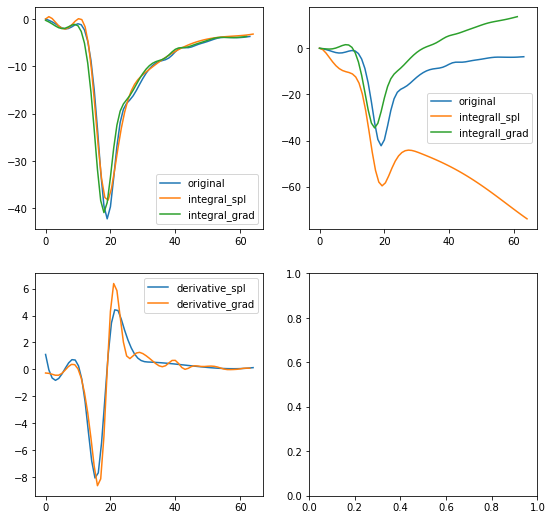

In [263]:
fig,axes = plt.subplots(2,2,figsize = (9,9))
axes[0][0].plot(x,label = 'original')
axes[0][0].plot(t2,integral(t2),label = 'integral_spl')
axes[0][0].plot(x_integ,label = 'integral_grad')
axes[0][0].legend()
axes[1][0].plot(t2,xspl_d(t2),label = 'derivative_spl')
axes[1][0].plot(grad,label = 'derivative_grad')
axes[1][0].legend()

axes[0][1].plot(x,label = 'original')
axes[0][1].plot(t2,integrall(t2),label = 'integrall_spl')
axes[0][1].plot(x_integg,label = 'integrall_grad')
axes[0][1].legend()



In [141]:
Cluster_selected = get_cluster_indexs(38,fl)
Emb = Neurons.loc[Cluster_selected]

Primero hacemos una interpolacion sobre cada media, calculamos su deivada segunda e integramos..

In [224]:
x = Emb.Mean
x = pd.DataFrame(x)
t = np.arange(64)
x['interp'] = x.Mean.apply(lambda row: UnivariateSpline(t,row,s = 0,k = 3))
t = np.linspace(0,64,10000)
#x['interp'] = x.interp.apply(lambda row: row(np.linspace(0,64,100)))
x['der'] = x.interp.apply(lambda row: row.derivative())
x['der2'] = x.interp.apply(lambda row: row.derivative(2))
x['integ'] = x.der2.apply(lambda row: row.antiderivative(2))

In [214]:
d = np.concatenate(x.der2.apply(lambda row:row(t)).values)
i = np.concatenate(x.integ.apply(lambda row: row(t)).values)
s = np.concatenate(x.interp.apply(lambda row: row(t)).values)

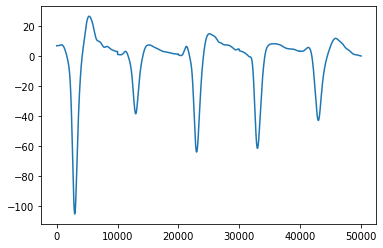

In [218]:
#plt.plot(d)
#plt.plot(i)
plt.plot(s)

Ahora nos gustaria hacer lo mismo, pero esta vez uniendo todo desde el principio. Comparamos con el gradiente de numpy

In [225]:
x = np.concatenate(x.Mean.values)
t2 = np.linspace(0,len(x),100)
grad = np.gradient(x)
x_integ = cumtrapz(grad)
xspl_d = xspl.derivative()
integral = xspl_d.antiderivative()

xspl_dd = xspl_d.derivative()
gradd = np.gradient(grad)
integrall =  xspl_dd.antiderivative().antiderivative()
x_integg = cumtrapz(cumtrapz(gradd))

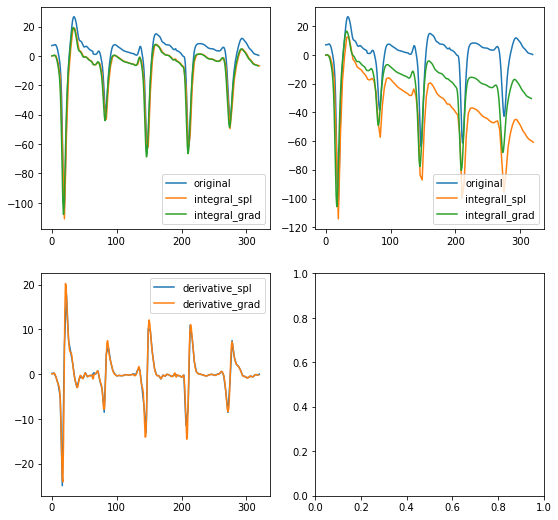

In [226]:
fig,axes = plt.subplots(2,2,figsize = (9,9))
axes[0][0].plot(x,label = 'original')
axes[0][0].plot(t2,integral(t2),label = 'integral_spl')
axes[0][0].plot(x_integ,label = 'integral_grad')
axes[0][0].legend()
axes[1][0].plot(t2,xspl_d(t2),label = 'derivative_spl')
axes[1][0].plot(grad,label = 'derivative_grad')
axes[1][0].legend()

axes[0][1].plot(x,label = 'original')
axes[0][1].plot(t2,integrall(t2),label = 'integrall_spl')
axes[0][1].plot(x_integg,label = 'integrall_grad')
axes[0][1].legend()




Parece que usar Univariatespline antes de calcular las derivadas  puede ser una buena opcion, no a si en las puntas.

In [158]:
x = Emb.Mean
x = pd.DataFrame(x)

In [164]:
x['1'] = x.Mean.apply(lambda row: 1)
x

,Mean,Derivative,1
10,"[7.084869405755161, 7.158852757959851, 7.18395...",<scipy.interpolate.fitpack2.InterpolatedUnivar...,1
135,"[1.3353093677274726, 1.2153801284232715, 1.126...",<scipy.interpolate.fitpack2.InterpolatedUnivar...,1
136,"[0.9612945509318417, 0.7539979975905501, 0.583...",<scipy.interpolate.fitpack2.InterpolatedUnivar...,1
151,"[3.7326546173818276, 3.6223592707564767, 3.442...",<scipy.interpolate.fitpack2.InterpolatedUnivar...,1
222,"[3.5041450224052917, 3.433929918432683, 3.4050...",<scipy.interpolate.fitpack2.InterpolatedUnivar...,1
